# Monte Carlo Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

seed = 239
rng = np.random.default_rng(seed)

In [2]:
def integrate_MC(f, N, sampling = 'uniform'):

    if sampling == 'gaussian':
        p = lambda x: np.exp(-x**2/2)/(np.sqrt(2*np.pi))
        x = rng.normal(size = N)    # Generate x values between +-xmax
    else:
        xmax = 3
        p = lambda x: np.ones_like(x) / (2*xmax)
        x = xmax*(-1 + 2*rng.uniform(size = N))
    
    return np.sum(f(x)/p(x)) / N

Integral from scipy.quad = 1.78596 with error 5.49113e-09
Uniform: I = 1.78656 +- 0.0220357; frac err = 0.0123341
Gaussian: I = 1.78585 +- 0.00960208; frac err = 0.00537675


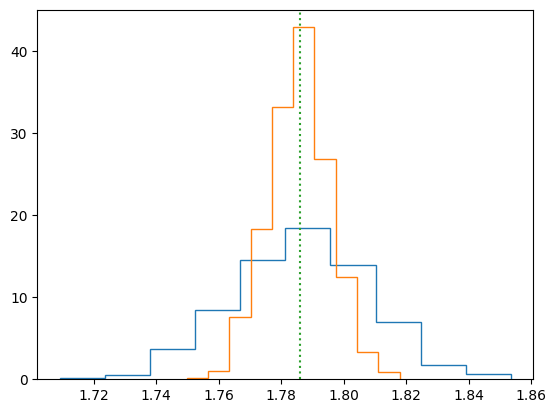

In [3]:
def f(x):
    return np.exp(-np.abs(x**3))

# Compute the integral using quad form comparison
I0, err = scipy.integrate.quad(f, -np.inf, np.inf)
print("Integral from scipy.quad = %g with error %g" % (I0, err))

N = 10**4

n_trials = 1000
I_arr = np.zeros(n_trials)
I2_arr = np.zeros(n_trials)

for i in range(n_trials):
    I_arr[i] = integrate_MC(f, N)
    I2_arr[i] = integrate_MC(f, N, sampling = 'gaussian')

I_mean = np.mean(I_arr)
I_std = np.std(I_arr)
print("Uniform: I = %g +- %g; frac err = %g" % (I_mean, I_std, I_std/I_mean))

I2_mean = np.mean(I2_arr)
I2_std = np.std(I2_arr)
print("Gaussian: I = %g +- %g; frac err = %g" % (I2_mean, I2_std, I2_std/I2_mean))

counts, bins = np.histogram(I_arr, bins=10, density = True)
plt.stairs(counts, bins)    
counts, bins = np.histogram(I2_arr, bins=10, density = True)
plt.stairs(counts, bins)    
plt.plot([I0, I0], (0,1.05*max(counts)), ":")
plt.ylim((0,1.05*max(counts)))
plt.show()